In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # data visualization
import random

In [2]:
df = pd.read_csv("val_stats.csv")
print(df.head())
print(df.info())

C:\Users\Mohsen\AppData\Local\Temp\ipykernel_13308\2214337487.py:1: DtypeWarning: Columns (0,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("val_stats.csv")


  region           name     tag   rating  damage_round headshots  \
0    NaN       ShimmyXD    #NA1  Radiant         135.8       992   
1    NaN      XSET Cryo  #cells  Radiant         170.3       879   
2    NaN  PuRelittleone  #yoruW  Radiant         147.5       720   
3    NaN           Boba   #0068  Radiant         178.2       856   
4    NaN    i love mina  #kelly  Radiant         149.8       534   

   headshot_percent  aces  clutches  flawless  ... gun2_name gun2_head  \
0              24.9     0       140        80  ...   Phantom        33   
1              28.3     2       122        94  ...  Operator         8   
2              24.0     3       117        59  ...   Phantom        36   
3              37.3     3        83        49  ...   Sheriff        48   
4              24.4     2        71        38  ...   Spectre        21   

  gun2_body gun2_legs  gun2_kills  gun3_name  gun3_head  gun3_body  gun3_legs  \
0        62         5         220    Classic         36         6

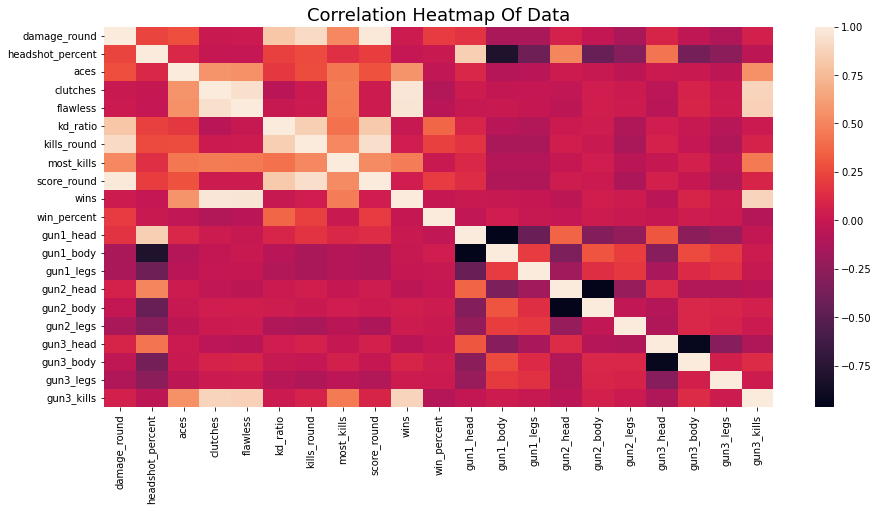

In [3]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.title("Correlation heatmap of data".title(),fontsize=18)
sns.heatmap(df.corr())
plt.show()

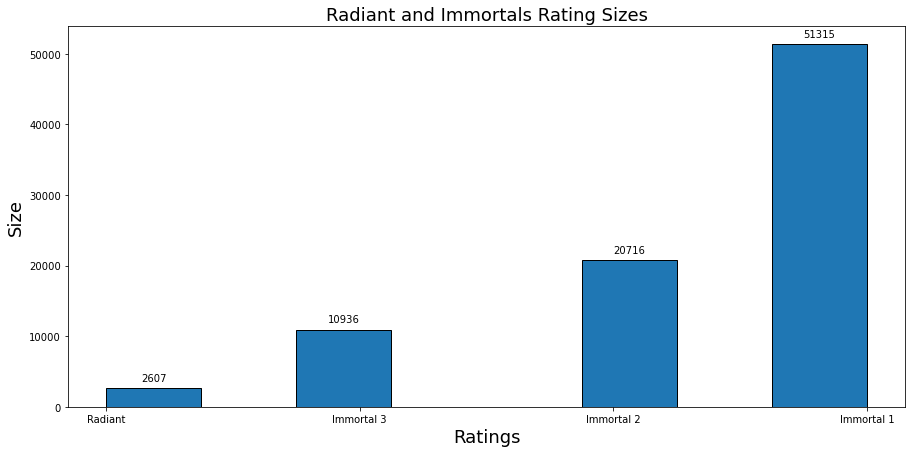

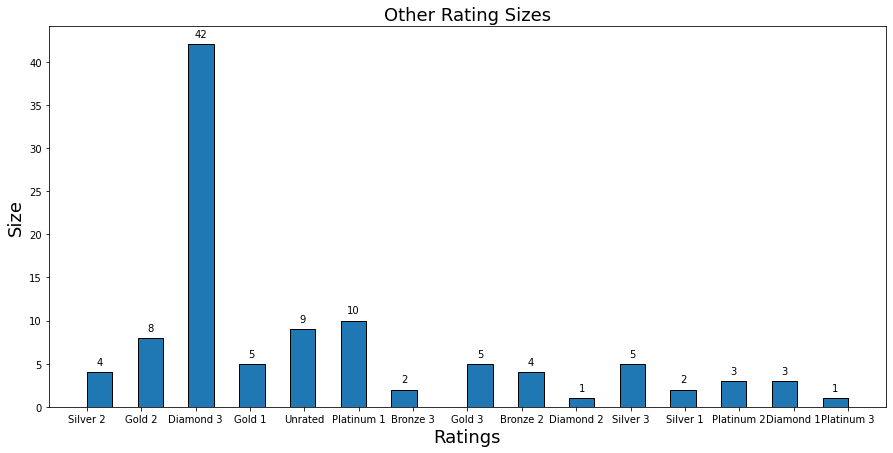

In [4]:
def plot_hist(data,ratings):
    fig, ax = plt.subplots(figsize=(15, 7))
    if "Radiant" in ratings:
        plt.title("Radiant and Immortals Rating Sizes",fontsize=18)
        plt.xlabel("Ratings",fontsize=18)
        plt.ylabel("Size",fontsize=18)
    else:
        plt.title("Other Rating Sizes",fontsize=18)
        plt.xlabel("Ratings",fontsize=18)
        plt.ylabel("Size",fontsize=18)


    plt.hist(data,bins = 2*len(ratings),edgecolor="Black",facecolor = "tab:blue")

    for rect in ax.patches:
        height = rect.get_height()
        if height == 0:
            pass
        else:
            ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height),
                        xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    plt.show()

rating_types = np.unique(list(df["rating"]))
Im_and_rad = [ 'Immortal 1','Immortal 2','Immortal 3','Radiant']

other_rats = list(rating_types)

for i in Im_and_rad:
    other_rats.remove(i)

Im_and_radSize = [i for i in df["rating"] if i in Im_and_rad]
other_ratSize = [i for i in df["rating"] if i in other_rats]

plot_hist(Im_and_radSize,Im_and_rad)
plot_hist(other_ratSize,other_rats)

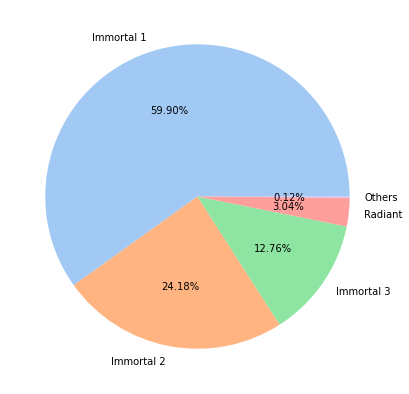

In [5]:
#Create Pie Chart
rating_percents = [round((list(df["rating"]).count(rating)/len(df["rating"]))*100,4) for rating in rating_types]
pie_data = [round(i,2) for i in rating_percents if i > 1] + [round(sum([i for i in rating_percents if i < 1]),2)]

colors = sns.color_palette('pastel')[0:5]
fig, ax = plt.subplots(figsize=(20,7))
plt.pie(pie_data, labels = Im_and_rad + ["Others"], colors = colors, autopct='%.2f%%')
plt.show()

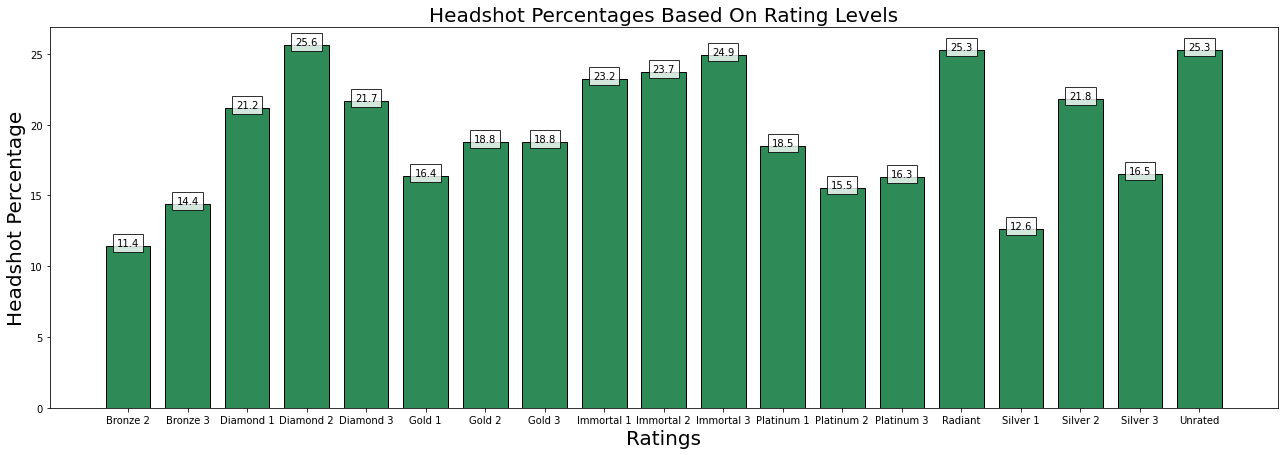

In [6]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = "center",bbox = dict(facecolor = "white", alpha =.8))


rating_and_headPer = {rating:[] for rating in rating_types}

for i in range(len(df["rating"])):
    rating_and_headPer[df.iloc[i]["rating"]] += [df.iloc[i]["headshot_percent"]]

rating_and_headPer_result = {rating:round(sum(values)/len(values),1) for rating,values in rating_and_headPer.items()}
ratings = list(rating_and_headPer_result.keys())
headPer_values = list(rating_and_headPer_result.values())

fig, ax = plt.subplots(figsize=(22, 7))
plt.title("Headshot percentages based on rating levels".title(),fontsize = 20)
plt.xlabel("Ratings",fontsize = 20);plt.ylabel("Headshot percentage".title(),fontsize = 20)
plt.bar(ratings,headPer_values,color = "seagreen", width = 0.75, edgecolor = "Black")
addlabels(ratings,headPer_values)
plt.show()


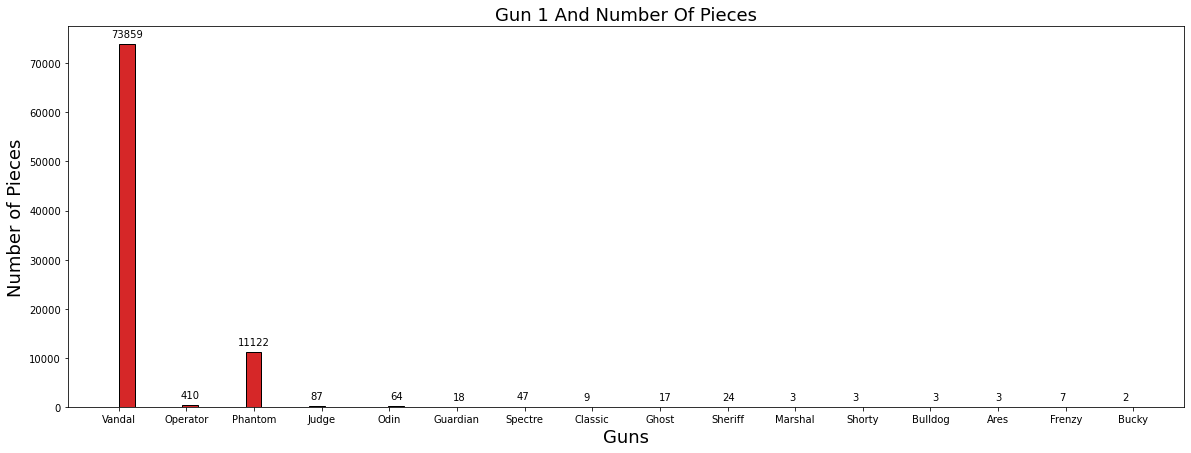

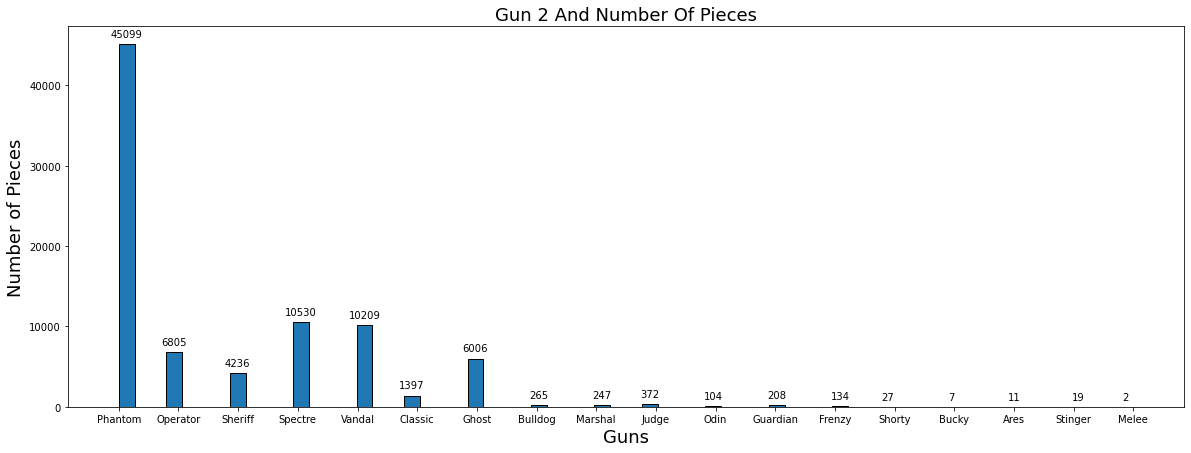

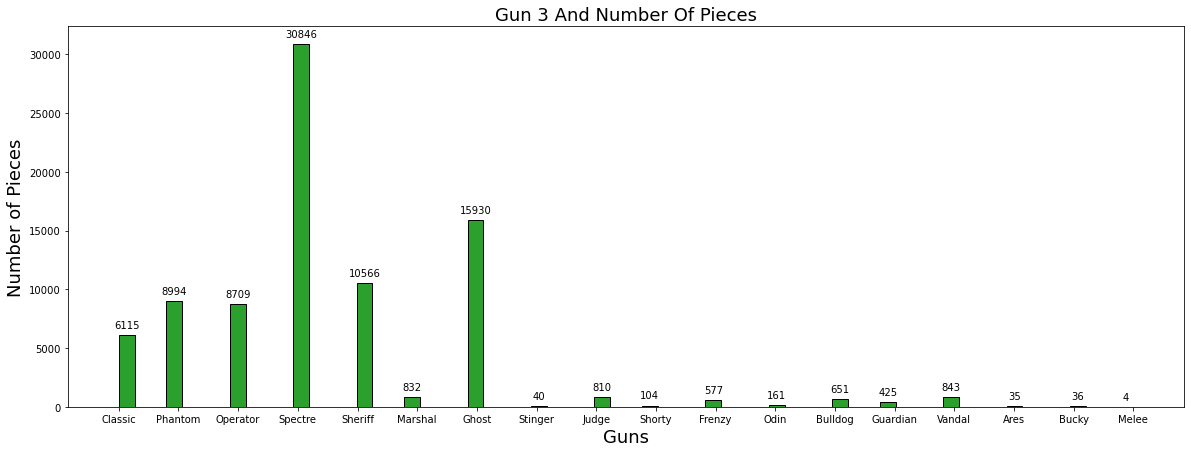

In [7]:
def addlabels_():
    for rect in ax.patches:
            height = rect.get_height()
            if height == 0:
                pass
            else:
                ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height),
                            xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

for i in range(1,4):
    colors = ["tab:red","tab:blue","tab:green"]
    fig,ax = plt.subplots(figsize = (20,7) )
    plt.hist(df["gun{}_name".format(i)],bins = 64,edgecolor="Black",facecolor = colors[i-1])
    addlabels_()
    plt.title("Gun {} and number of pieces".format(i).title(),fontsize = 18)
    plt.xlabel("Guns",fontsize = 18);plt.ylabel("Number of Pieces",fontsize = 18)

    plt.show()

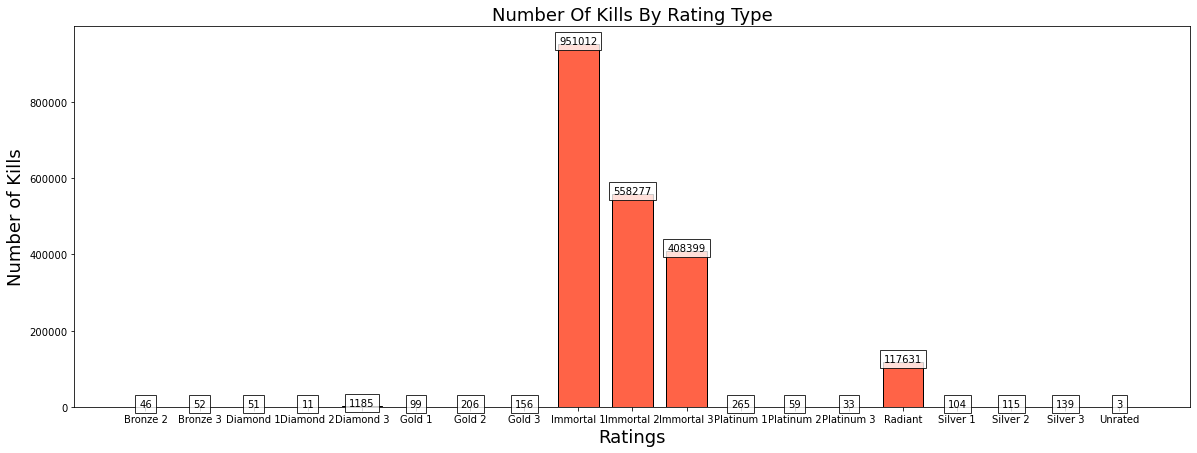

In [8]:
df_RatAndWins = df[["rating","wins"]]
RatAndWins_result = {rating:0 for rating in rating_types}
for i in range(len(df_RatAndWins)):
    RatAndWins_result[df_RatAndWins.iloc[i][0]] += df_RatAndWins.iloc[i][1]

ratings_ = list(RatAndWins_result.keys())
kills_ = list(RatAndWins_result.values())

fig,ax = plt.subplots(figsize = (20,7))
plt.bar(ratings_,kills_,color = "tomato",width = 0.75, edgecolor = "Black")
addlabels(ratings_,kills_)
plt.xlabel("Ratings",fontsize = 18)
plt.ylabel("Number of Kills",fontsize = 18)
plt.title("Number of kills by rating type".title(),fontsize = 18)
plt.show()

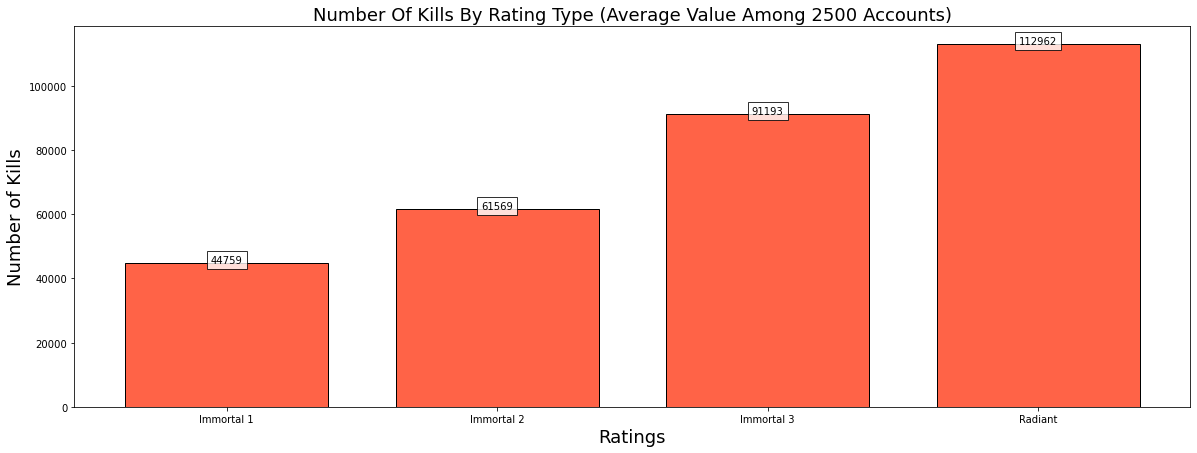

In [9]:
opt_ratingAndWins = {rating:[] for rating in Im_and_rad}
for rating in Im_and_rad:
    for i in range(len(df_RatAndWins)):
        if df_RatAndWins.iloc[i][0] == rating:
            if len(opt_ratingAndWins[rating]) <= 2500:
                opt_ratingAndWins[rating] += [df_RatAndWins.iloc[i][1]]
            else:
                break

opt_ratingAndWins_result = {rating:round(sum(kills),0) for rating,kills in opt_ratingAndWins.items() }

values_opt = list(opt_ratingAndWins_result.values())
ratings_opt = list(opt_ratingAndWins_result.keys())
fig,ax = plt.subplots(figsize = (20,7))
plt.bar(ratings_opt,values_opt,color = "tomato",width = 0.75, edgecolor = "Black")
addlabels(ratings_opt,values_opt)
plt.xlabel("Ratings",fontsize = 18)
plt.ylabel("Number of Kills",fontsize = 18)
plt.title("Number of kills by rating type (Average value among 2500 accounts)".title(),fontsize = 18)
plt.show()
